In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Users\Axelrod\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


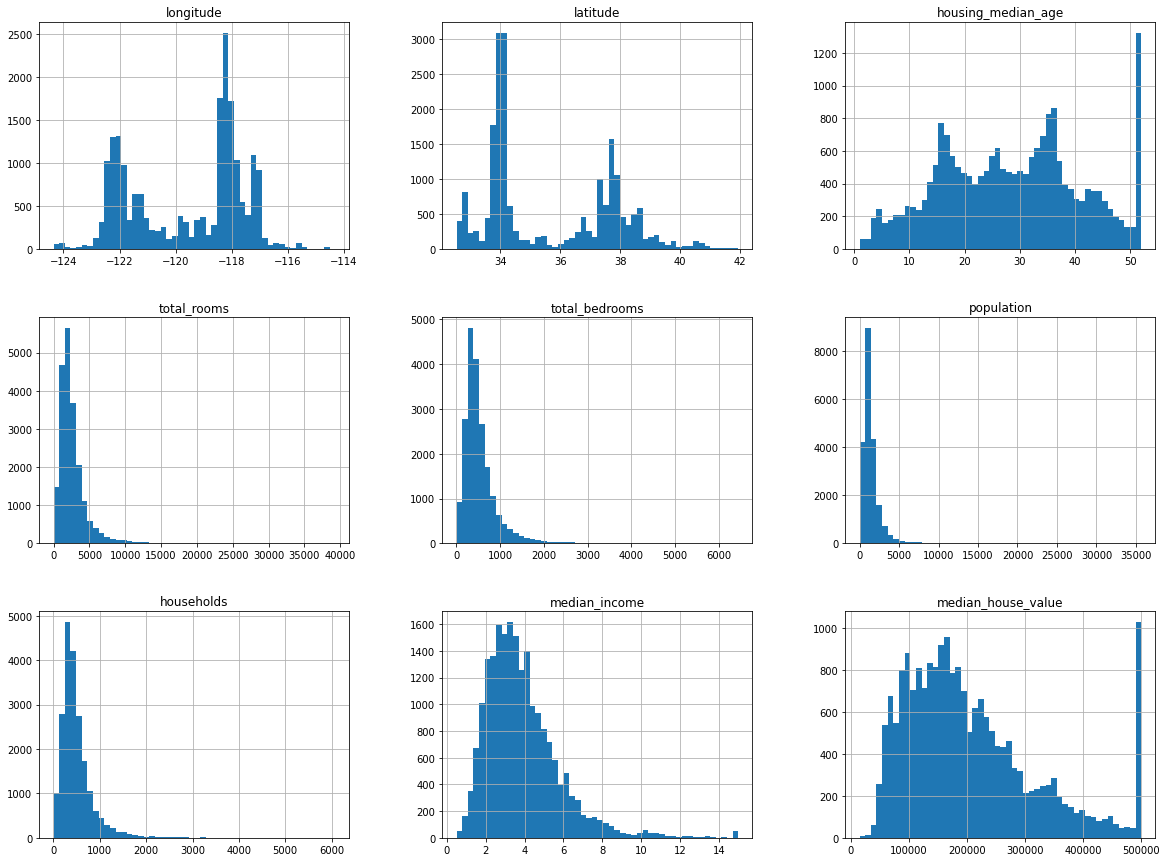

In [7]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
mean = housing['total_bedrooms'].mean()
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(mean)

In [11]:
housing['avg_rooms'] = housing['total_rooms'] / housing['households']
housing['avg_bedrooms'] = housing['total_bedrooms'] / housing['households']

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081


In [13]:
corr = housing.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.011079
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,0.062414
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,-0.054704
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.133798,0.009005
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.001535,0.039920
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.072213,-0.074885
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.080598,-0.066444
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,0.326895,-0.047291
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.044265
avg_rooms,-0.027540,0.106389,-0.153277,0.133798,0.001535,-0.072213,-0.080598,0.326895,0.151948,1.000000,0.741273


<AxesSubplot:>

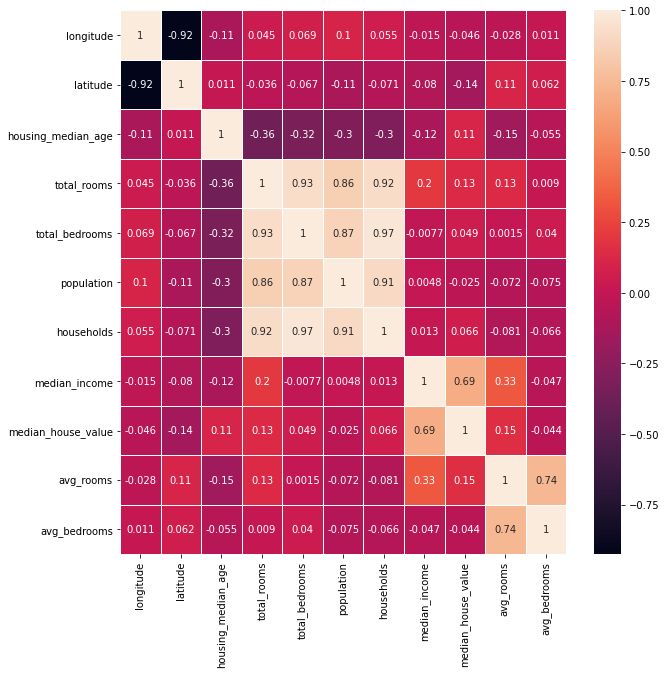

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, annot = True, linewidth = 0.5)

In [15]:
housing['pop_household'] = housing['population'] / housing['households']

In [16]:
housing_num = housing.drop('ocean_proximity',axis=1)

In [17]:
housing_cat = housing[['ocean_proximity']]

In [18]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [19]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoder = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoder

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [20]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [21]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [22]:
onehot = housing_cat_1hot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = list(cat_encoder.categories_)

In [23]:
final = pd.concat([housing_num, onehot],axis=1)

In [24]:
final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms,pop_household,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,1.133333,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,1.315789,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,1.120092,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,1.171920,2.123209,0.0,1.0,0.0,0.0,0.0


In [25]:
final.columns

Index([         'longitude',           'latitude', 'housing_median_age',
              'total_rooms',     'total_bedrooms',         'population',
               'households',      'median_income', 'median_house_value',
                'avg_rooms',       'avg_bedrooms',      'pop_household',
             ('<1H OCEAN',),          ('INLAND',),          ('ISLAND',),
              ('NEAR BAY',),      ('NEAR OCEAN',)],
      dtype='object')

In [26]:
final.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
avg_rooms             0
avg_bedrooms          0
pop_household         0
(<1H OCEAN,)          0
(INLAND,)             0
(ISLAND,)             0
(NEAR BAY,)           0
(NEAR OCEAN,)         0
dtype: int64

In [27]:
final[['total_bedrooms','total_rooms','households','median_house_value']]

,total_bedrooms,total_rooms,households,median_house_value
0,129.0,880.0,126.0,452600.0
1,1106.0,7099.0,1138.0,358500.0
2,190.0,1467.0,177.0,352100.0
3,235.0,1274.0,219.0,341300.0
4,280.0,1627.0,259.0,342200.0
...,...,...,...,...
20635,374.0,1665.0,330.0,78100.0
20636,150.0,697.0,114.0,77100.0
20637,485.0,2254.0,433.0,92300.0
20638,409.0,1860.0,349.0,84700.0


In [30]:
from sklearn.model_selection import train_test_split

train_x = final.drop(['total_rooms','total_bedrooms','households',
                       'median_house_value'],axis=1)
train_y = final['median_house_value']

X,test_X,y,test_y = train_test_split(train_x,train_y, test_size = 0.2)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1000)

In [55]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1000)

In [56]:
knn.score(test_X, test_y)

0.048207364341085274

# Predicting


In [60]:
some_data = final.iloc[:100]
some_data = some_data.drop(['total_rooms','total_bedrooms','households',
                       'median_house_value'],axis=1)

In [61]:
prediction = knn.predict(some_data)

In [62]:
print(prediction)

[500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001. 500001.
 500001.]
